In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as TTS
from sklearn.linear_model import LogisticRegression as LOR
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [3]:
auto =pd.read_csv("diabetes.csv")
auto.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
X=df.drop(columns=['Outcome'])
Y=df['Outcome']

In [13]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [15]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [17]:
X_train,X_test,Y_train,Y_test=TTS(X,Y,test_size=0.30,random_state=0)
print(X_train,X_test,Y_train,Y_test)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
580            0      151             90             46        0  42.1   
418            1       83             68              0        0  18.2   
764            2      122             70             27        0  36.8   
363            4      146             78              0        0  38.5   
757            0      123             72              0        0  36.3   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
192            7      159             66              0        0  30.4   
629            4       94             65             22        0  24.7   
559           11       85             74              0        0  30.1   
684            5      136             82              0        0   0.0   

     DiabetesPedigreeFunction  Age  
580                     0.371   21  
418                     0.624   27  


In [19]:
model = LOR(max_iter=1000)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [21]:
Y_pred = model.predict(X_test)

In [23]:
df_test_predict = X_test
df_test_predict["Y_test"]=Y_test
df_test_predict["Y_pred"]=Y_pred
df_test_predict

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Y_test,Y_pred
661,1,199,76,43,0,42.9,1.394,22,1,1
122,2,107,74,30,100,33.6,0.404,23,0,0
113,4,76,62,0,0,34.0,0.391,25,0,0
14,5,166,72,19,175,25.8,0.587,51,1,1
529,0,111,65,0,0,24.6,0.660,31,0,0
...,...,...,...,...,...,...,...,...,...,...
165,6,104,74,18,156,29.9,0.722,41,1,0
188,8,109,76,39,114,27.9,0.640,31,1,0
334,1,95,60,18,58,23.9,0.260,22,0,0
758,1,106,76,0,0,37.5,0.197,26,0,0


In [25]:
CM=confusion_matrix(Y_test,Y_pred)
AS=accuracy_score (Y_test,Y_pred)
RS=recall_score(Y_test,Y_pred)
PS=precision_score(Y_test,Y_pred)
F1=f1_score(Y_test,Y_pred)
print(f"Accuracy Score = {AS} \nPrecision Score = {PS} \nRecall Score = {RS}\nF1 Score = {F1}") 


Accuracy Score = 0.7792207792207793 
Precision Score = 0.7090909090909091 
Recall Score = 0.527027027027027
F1 Score = 0.6046511627906976


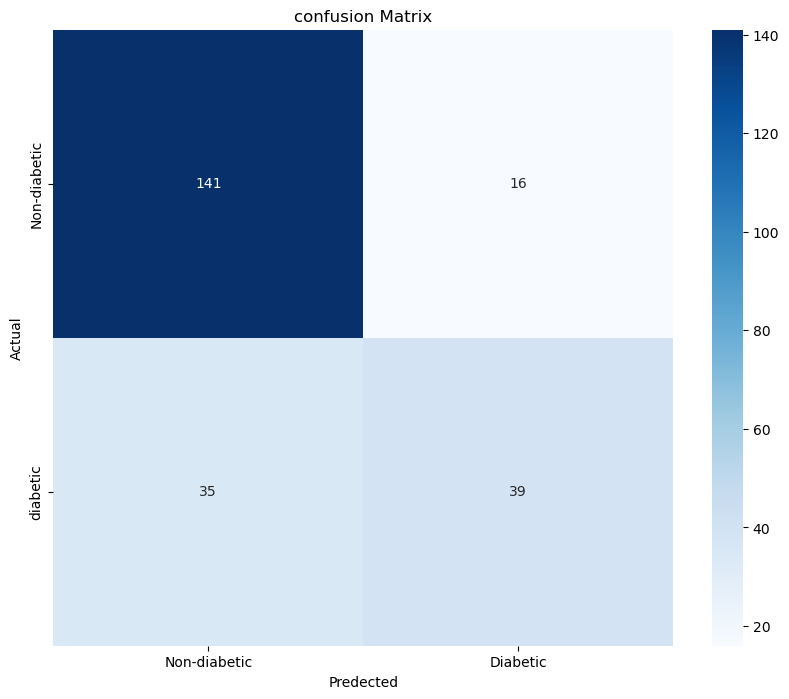

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(CM,annot=True,fmt='d',cmap='Blues',
            xticklabels=["Non-diabetic","Diabetic"],
            yticklabels=["Non-diabetic","diabetic"])
plt.xlabel('Predected')
plt.ylabel('Actual')
plt.title('confusion Matrix')
plt.show()

In [39]:
model = LR()
model.fit(X,Y)

LinearRegression()

In [41]:
y=model.predict(X)

In [43]:
y

array([ 6.51757285e-01,  5.73265155e-03,  7.36424493e-01, -2.19231992e-02,
        8.33189374e-01,  2.10541452e-01,  5.73623835e-02,  5.96120386e-01,
        6.65415214e-01,  2.72879077e-03,  2.69910124e-01,  8.45538348e-01,
        7.08893917e-01,  6.08446291e-01,  5.97092921e-01,  4.34744595e-01,
        3.83527276e-01,  2.61843842e-01,  3.84333746e-01,  2.91618440e-01,
        4.07463315e-01,  3.58106422e-01,  9.41746905e-01,  3.53623710e-01,
        6.34580785e-01,  4.61633282e-01,  6.55680949e-01,  7.39858363e-04,
        5.43612760e-01,  3.28057612e-01,  4.37961835e-01,  5.44602908e-01,
        1.10022798e-02, -3.55749031e-02,  4.56084858e-01,  2.15379236e-01,
        6.05681535e-01,  4.18020493e-01,  2.18796168e-01,  5.30431675e-01,
        6.73870456e-01,  6.13646193e-01,  1.67113470e-01,  8.96665240e-01,
        5.93361998e-01,  9.64381760e-01,  4.52882302e-01, -3.66459558e-02,
        4.00832085e-01,  1.96983636e-02, -3.62702572e-02,  1.09978470e-01,
        6.73891043e-02,  

In [49]:
MSE=mean_squared_error(Y,y)
MAE=mean_absolute_error(Y,y)
R2=r2_score(Y,y)


MSE

In [54]:
print(f"mean squared error = {MSE} \n Mean absolute error = {MAE} \n R2 error = {R2}")

mean squared error = 0.15829143131303658 
 Mean absolute error = 0.33220032979741054 
 R2 error = 0.303253095650892


NameError: name 'x_sur' is not defined

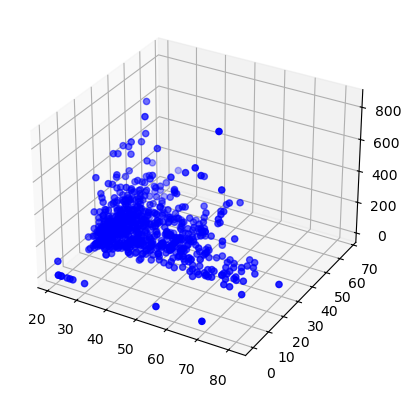

In [72]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df["Age"],df["BMI"],df["Insulin"],color='blue',label="Actual data")
ax.plot_surface(x_sur,y_sur,z_sur,color='red',label="Predicted Value",alpha=1.5)
ax.set_xlabel("Age")
ax.set_ylabel("BMI")
ax.set_zlabel("Insulin")
ax.set_title("Age and BMI vs Insulin")
plt.legend()
plt.show()